In [32]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
dataset=pd.read_csv('/content/crime_data.csv')

In [34]:
dataset.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

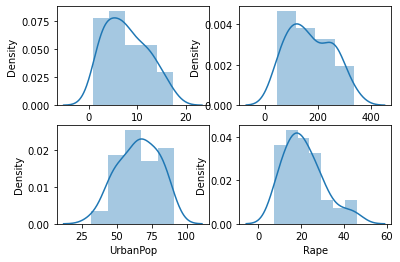

In [36]:
name=dataset.columns
for i in range(1,len(name)):
  plt.subplot(2,2,i)
  sns.distplot(dataset[name[i]])

Give us an idea about distribution of the data 

Outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

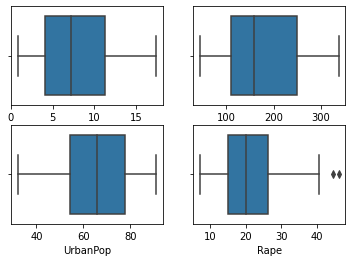

In [37]:
name=dataset.columns
for i in range(1,len(name)):
  plt.subplot(2,2,i)
  sns.boxplot(dataset[name[i]])

This gives us an idea about the outlier in the dataset

In [38]:
dataset['Unnamed: 0'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
       'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

Missing values

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


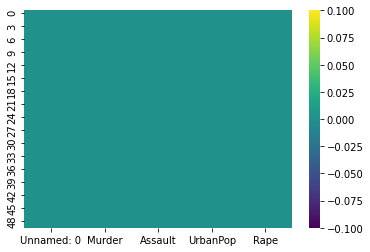

In [40]:
sns.heatmap(dataset.isnull(),cmap='viridis')

In [41]:
dataset.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

There is no missing values in the data set

Duplicate values

In [42]:
dataset.duplicated().sum()

0

There is no duplicate values present in the data set

In [43]:
dataset.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


Here feature scaling is required or else during the distance calculation the parameter assault will be having a dominating effect on the model

let us now select only the numerical parameters from the dataset

In [44]:
X=dataset.iloc[:,1:]

In [45]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)

In [46]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

**Hierarchical clustering**

Hierarchical clustering using ward linkage

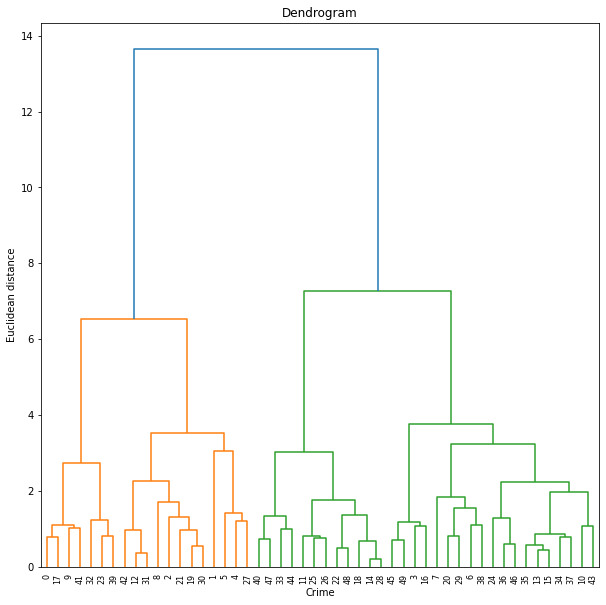

In [47]:
import scipy.cluster.hierarchy as sch
fig=plt.figure(figsize=(10,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Crime')
plt.ylabel('Euclidean distance')
plt.show()

On observing the dendrogram we can infer that the max euclidean distance suggest
that the optimal no of split is 2

The whole data set is split into two parts we can infer from colour coding

In [48]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Creating dataframe with  column name hierarchical clustering

In [49]:
Hierarchical=pd.DataFrame(y_hc,columns=['Hierarchical cluster'])

In [50]:
Hierarchical.head()

,Hierarchical cluster
0,1
1,1
2,1
3,0
4,1


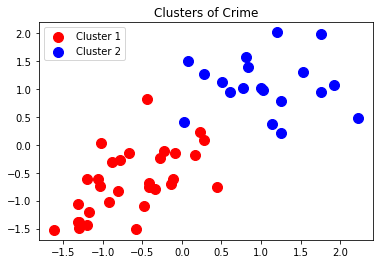

In [51]:
# Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Crime')
plt.legend()
plt.show()

In [52]:
y_hc

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

**From hierarchical clustering we can classify the crime into 2 groups 1 and 0**

**K-mean Clustering**

We have to use elbow method to find the optimal no: of clusters

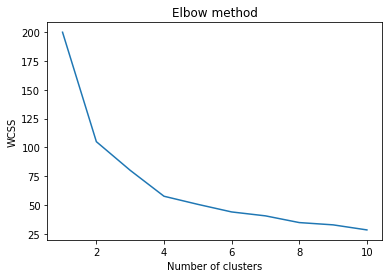

In [53]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  Kmeans=KMeans(n_clusters=i,random_state=0)
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we can select k=4 which has a balance between no of clusters and homogenity of each cluster the homogenity

In [54]:
kcluster=KMeans(4,random_state=42)
kcluster.fit(X)

KMeans(n_clusters=4, random_state=42)

In [55]:
y_kmeans=kcluster.predict(X)

In [56]:
kcluster.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0], dtype=int32)

Creating a data frame with 4 cluster 

In [57]:
kmean_cluster=pd.DataFrame(kcluster.labels_,columns=['Kmeans_cluster'])

In [58]:
kmean_cluster.head()

,Kmeans_cluster
0,1
1,2
2,2
3,1
4,2


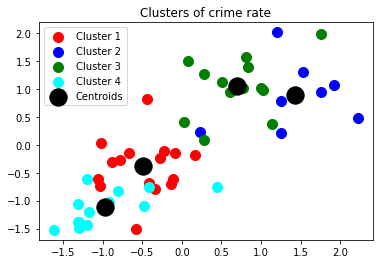

In [62]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kcluster.cluster_centers_[:, 0], kcluster.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroids')
plt.title('Clusters of crime rate')
plt.legend()
plt.show()


Here the data set is divided into 4 clusters using K-means method

**DBScan**

In [64]:
from sklearn.cluster import DBSCAN

Let us set the epsilon =4 and minimum no: of points=5

In [65]:
db_scan=DBSCAN(eps=4,min_samples=5)
db_scan.fit(X)

DBSCAN(eps=4)

In [67]:
db_scan_cluster=db_scan.labels_

In [68]:
db_scan_cluster

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

For the above condition we are only getting 1 cluster,so we will change the parameters

In [70]:
db_scan=DBSCAN(eps=1,min_samples=3)
db_scan.fit(X)
db_scan_cluster=db_scan.labels_
db_scan_cluster

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1,  0, -1,  1,  2,  1,  1,  1,  1,
        0,  1,  3,  1,  3,  1,  0,  1,  1,  1, -1,  1,  1,  3,  2, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  2,  1,  1,  1,  1,  1,  1,  1])

Based on the above criterion we are getting a cluster of 5 groups which -1 indicating the outliers in the dataset

creating data frame of these clusters

In [71]:
db_df=pd.DataFrame(db_scan_cluster,columns=['DBSCAN Clusters'])
db_df.head()

,DBSCAN Clusters
0,0
1,-1
2,-1
3,-1
4,-1


Final data set showing diffent clusters

In [74]:
final_df=pd.concat([dataset,Hierarchical,kmean_cluster,db_df],axis=1)

In [75]:
final_df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,Hierarchical cluster,Kmeans_cluster,DBSCAN Clusters
0,Alabama,13.2,236,58,21.2,1,1,0
1,Alaska,10.0,263,48,44.5,1,2,-1
2,Arizona,8.1,294,80,31.0,1,2,-1
3,Arkansas,8.8,190,50,19.5,0,1,-1
4,California,9.0,276,91,40.6,1,2,-1


The above data sets are cluster using 3 methods and concatinated with the final data set